<div dir="rtl">
    <div style="text-align: center;">
        <h1 style="font-family: 'B Nazanin', sans-serif; font-weight: bold;">بسمه تعالی</h1>
</div>

<h1 align="left">🌟 Project Title:</h1>
<h3 align="center">🚀 <b>Intelligent Oil Price Prediction Using Advanced Machine Learning Models and Neural Networks</b></h3>

<div style="text-align: center;">
    <a href="https://github.com/M-RezaeiGH">
        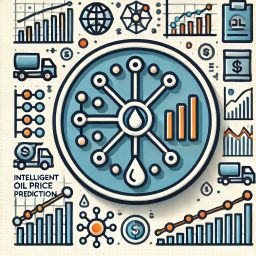
    </a>
</div>

<br><hr><br>

<h1 align="left">👨‍💻 Developer:</h1>
<h3 align="left">*** Mohammad Reza Rezaei ***</h3>

<div align="left">
  🔗 <a href="https://www.linkedin.com/in/m-rezaei/">LinkedIn</a> | 
  📂 <a href="https://github.com/M-RezaeiGH">GitHub</a>
</div>


##

## 📊 Dataset Introduction:
The dataset contains **1,262,329 rows** of real crude oil price data, which includes the following columns:

1. 📅 **DATE**: The date corresponding to the oil price.
2. ⏰ **TIME**: The time associated with the oil price.
3. 💰 **OPEN**: The opening price of oil at a specific time.
4. 📈 **HIGH**: The highest price of oil at a specific time.
5. 📉 **LOW**: The lowest price of oil at a specific time.
6. 🔒 **CLOSE**: The closing price of oil at a specific time.
7. 🔄 **TICKVOL**: The number of times the price of an asset (oil) has changed within a specific time frame. Higher TICKVOL indicates more price volatility and higher trading volume.
8. 📦 **VOL**: The total number of units of oil (barrels) traded within a specific time frame. VOL is crucial for determining the strength of a trend.
9. 📊 **SPREAD**: The difference between the bid price and the ask price at a given time. Values of 0, 1, and 2 indicate different spread levels (0 for tight, 1 for medium, 2 for wider spread).


##

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-weight: bold;">&star; Step4: Implementing the Prophet Algorithm </h1>
    </div>
</div>

### Notebook Description:
The Prophet algorithm was developed by the Facebook data engineering team. This algorithm is used for time series forecasting. Its main goal is to provide a simple and efficient method for predicting time series with common patterns and seasonal variations

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Installation: </h1>
    </div>
</div>

In [1]:
# Use Prophet in google colab.
!pip install prophet

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Import Necessary Libraries: </h1>
    </div>
</div>

In [1]:
# from src import DATA_DIR
import pandas as pd
import numpy as np
from numpy import where
from datetime import datetime
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import probplot
from scipy import stats
from pylab import rcParams
from plotly import tools
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import pkg_resources
import warnings
warnings.filterwarnings('ignore')

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Libraries Version Auto-Code: </h1>
    </div>
</div>

In [2]:
import pkg_resources

def get_package_version(package_name):
    try:
        package_version = pkg_resources.get_distribution(package_name).version
        return package_version
    except pkg_resources.DistributionNotFound:
        return None

imported_libraries = ['numpy', 'pandas','seaborn','matplotlib','scipy','plotly','IPython','numba','prophet','sklearn',]

for library in imported_libraries:
    version = get_package_version(library)
    if version:
        print(f"{library}: {version}")
    else:
        print(f"{library}: Not found")

numpy: 1.25.2
pandas: 1.5.3
seaborn: 0.13.1
matplotlib: 3.7.1
scipy: 1.11.4
plotly: 5.15.0
IPython: 7.34.0
numba: 0.58.1
prophet: 1.1.5
sklearn: Not found


##

<div dir="ltr">
    <div style="text-align: LEFT;">
        <h1 font-size: 14pt;">&star; Read Data from my SRC folder: </h1>
    </div>
</div>

In [3]:
# for open in Google Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# file_path: use your file path in google colab
df = pd.read_csv(file_path, parse_dates=True, squeeze=True)
df.columns = ["Date", "Close"]
df["Date"] = pd.to_datetime(df["Date"])
print(df.shape)
df.head()

(1262327, 2)


,Date,Close
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


In [7]:
# first day and last day of the DATE column:

min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"محدوده تاریخ: {min_date} تا {max_date}")

محدوده تاریخ: 2006-02-03 00:00:00 تا 2020-09-29 14:34:00


In [8]:
range_ = pd.date_range('2006-02-03', '2020-09-29', freq='B')
range_

DatetimeIndex(['2006-02-03', '2006-02-06', '2006-02-07', '2006-02-08',
               '2006-02-09', '2006-02-10', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-28', '2020-09-29'],
              dtype='datetime64[ns]', length=3823, freq='B')

In [9]:
# Initialize an empty list to store data
data = []

# Loop through each day in the specified range
for day in range_:
    temp = []  # Temporary list for storing day and mean close value
    temp.append(day.date())  # Append the date
    # Calculate the mean of the 'Close' prices for the given day and round to 2 decimal places
    temp.append(round(np.mean(np.array(df[df["Date"] == day]["Close"])), 2))  
    data.append(temp)  # Append the temporary list to data

# Create a new DataFrame from the collected data
new_df = pd.DataFrame(data)

# Display the first few rows of the new DataFrame
new_df.head()


,0,1
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


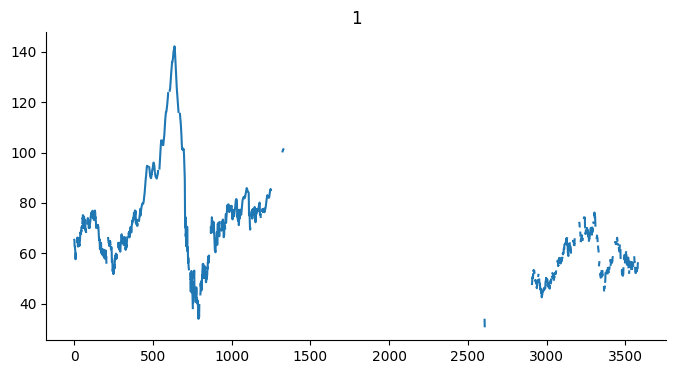

In [10]:
new_df[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
num_nans = new_df.isnull().sum(axis = 0)
num_nans

0       0
1    2289
dtype: int64

In [12]:
new_df.dropna(inplace=True)

In [13]:
new_df.columns = ["Date", "Close"]

In [14]:
new_df.head()

,Date,Close
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


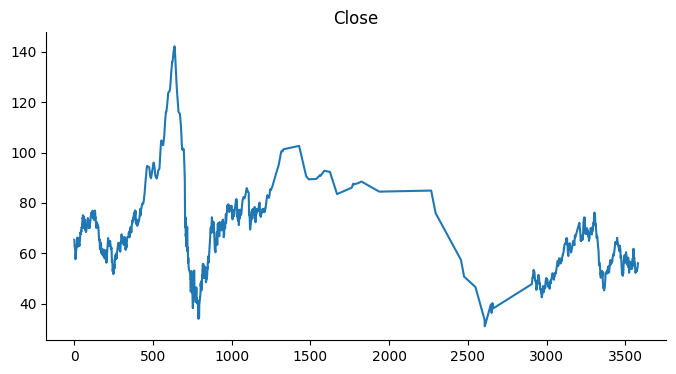

In [15]:
new_df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
# Required changes for working with the Prophet algorithm:
new_df.columns = ['ds', 'y']  # Rename the columns to 'ds' for dates and 'y' for values
new_df['ds'] = pd.to_datetime(new_df['ds'])  # Convert the 'ds' column to datetime format

# Display the first few rows of the updated DataFrame
new_df.head()

,ds,y
0,2006-02-03,65.37
1,2006-02-06,65.11
2,2006-02-07,63.09
3,2006-02-08,62.55
4,2006-02-09,62.62


Scaling the data using Min-Max Scaler:

In [18]:
model = Prophet()
modelfit = model.fit(new_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryccggpc/9qwrwjf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryccggpc/nc0eruzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19088', 'data', 'file=/tmp/tmpryccggpc/9qwrwjf4.json', 'init=/tmp/tmpryccggpc/nc0eruzo.json', 'output', 'file=/tmp/tmpryccggpc/prophet_modelixvwnavr/prophet_model-20240312143057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Make an In-Sample Forecast

In [20]:
# first day and last day of the DATE column:

##way1:
min_date = new_df['ds'].min()
max_date = new_df['ds'].max()
print(f"محدوده تاریخ: {min_date} تا {max_date}")

# #way2:
# df['DATE'].describe(datetime_is_numeric = True)

محدوده تاریخ: 2006-02-03 00:00:00 تا 2019-10-25 00:00:00


In [21]:
# Create a future data series starting from the first day of each month
# The last date in our DataFrame was: 2019-10-25

future = []  # Initialize an empty list for future dates
for i in range(1, 13):  # Loop through the months from 1 to 12
    date = '2019-%02d' % i  # Format the date to ensure two digits for the month
    future.append([date])  # Append the formatted date to the list

# Create a DataFrame from the future dates
future = pd.DataFrame(future)
future.columns = ['ds']  # Rename the column to 'ds'
future['ds'] = pd.to_datetime(future['ds'])  # Convert the 'ds' column to datetime format

# Display the future DataFrame
future


,ds
0,2019-01-01
1,2019-02-01
2,2019-03-01
3,2019-04-01
4,2019-05-01
5,2019-06-01
6,2019-07-01
7,2019-08-01
8,2019-09-01
9,2019-10-01


In [22]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(12))

           ds       yhat  yhat_lower  yhat_upper
0  2019-01-01  53.934226   43.190022   64.877360
1  2019-02-01  51.356381   40.482162   61.133552
2  2019-03-01  57.583829   46.555507   67.802731
3  2019-04-01  57.215281   46.584274   67.521522
4  2019-05-01  59.946301   49.803462   70.135510
5  2019-06-01  59.308910   48.960212   70.319182
6  2019-07-01  63.562535   53.056441   74.827740
7  2019-08-01  64.609548   54.661833   75.534121
8  2019-09-01  58.408337   48.172346   68.636912
9  2019-10-01  60.722525   50.890428   71.193544
10 2019-11-01  58.000221   47.813985   68.659673
11 2019-12-01  54.828902   43.377527   65.626206


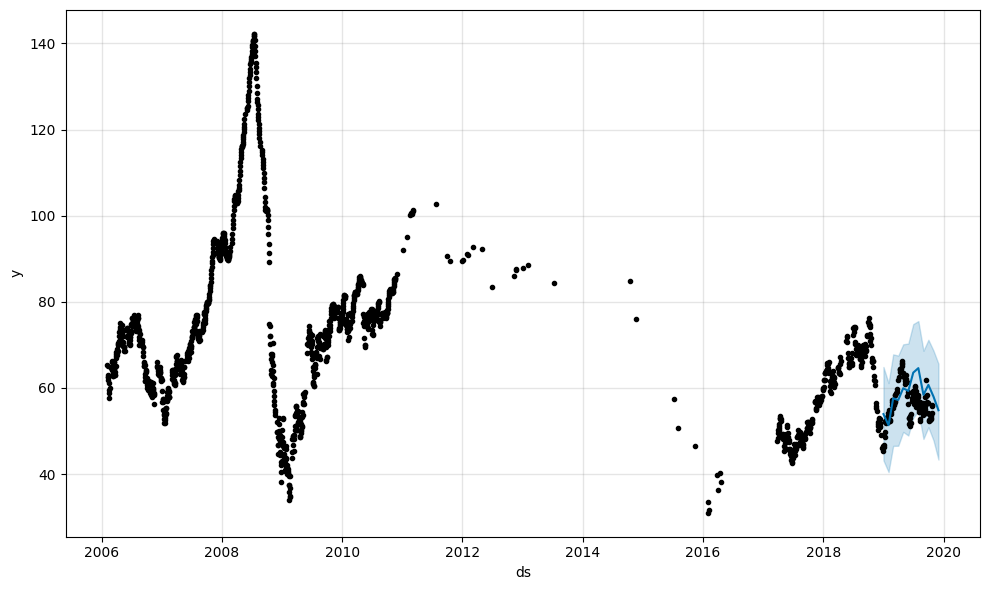

In [23]:
model.plot(forecast)
plt.show()

# Make an Out-of-Sample Forecast

In [24]:
future = model.make_future_dataframe(periods=12, freq='M', include_history=False)
future

,ds
0,2019-10-31
1,2019-11-30
2,2019-12-31
3,2020-01-31
4,2020-02-29
5,2020-03-31
6,2020-04-30
7,2020-05-31
8,2020-06-30
9,2020-07-31


          ds       yhat  yhat_lower  yhat_upper
0 2019-10-31  58.470380   47.773026   68.613289
1 2019-11-30  55.046122   45.162607   65.737720
2 2019-12-31  56.333326   45.338639   67.955257
3 2020-01-31  54.026144   42.848815   65.796152
4 2020-02-29  57.471227   46.548604   69.365797


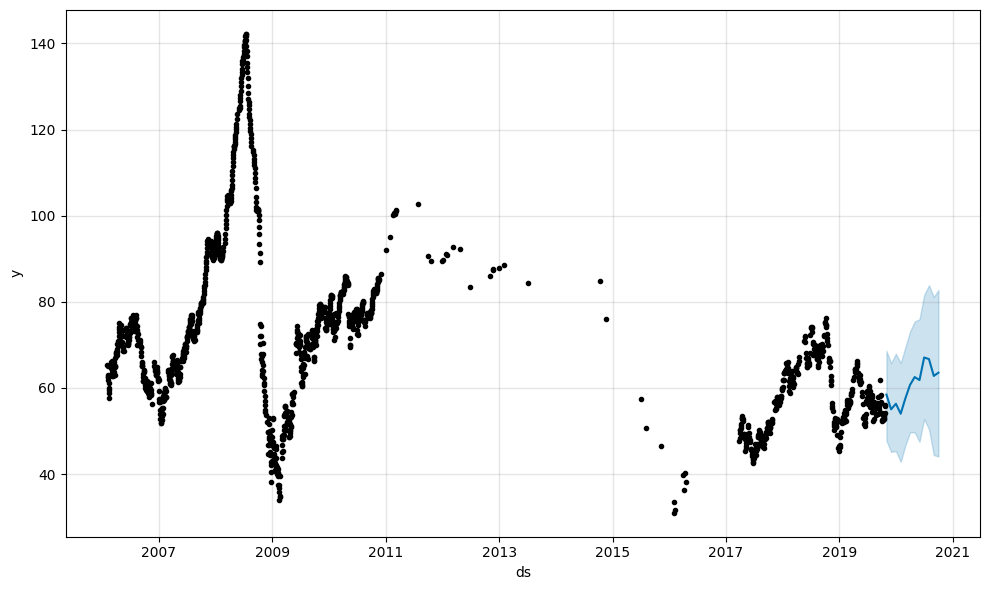

In [25]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

# Evaluation

In [51]:
# می توانیم قسمت آخر دیتا را به مدل ندهم و به عنوان تست در نظر بگیرم و ارزیابی نمایم.
L_test = int(0.10*len(new_df))
train = new_df.drop(new_df.index[-L_test:])
test = new_df.drop(new_df.index[:-L_test])
train.tail()

,ds,y
3328,2018-11-07,61.76
3329,2018-11-08,61.54
3330,2018-11-09,60.74
3333,2018-11-14,55.24
3334,2018-11-15,55.92


In [52]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryccggpc/3tl1mwvg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpryccggpc/z299wp2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36452', 'data', 'file=/tmp/tmpryccggpc/3tl1mwvg.json', 'init=/tmp/tmpryccggpc/z299wp2w.json', 'output', 'file=/tmp/tmpryccggpc/prophet_model_98frk_v/prophet_model-20240312144509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
future = test.drop('y', axis=1)
future

,ds
3335,2018-11-16
3339,2018-11-22
3342,2018-11-27
3343,2018-11-28
3344,2018-11-29
...,...
3574,2019-10-17
3575,2019-10-18
3578,2019-10-23
3579,2019-10-24


In [54]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-11-16,54.281851,42.501868,65.949291,54.281851,54.281851,0.027284,0.027284,0.027284,0.687897,0.687897,0.687897,-0.660613,-0.660613,-0.660613,0.0,0.0,0.0,54.309135
1,2018-11-22,54.232992,42.053648,66.320672,54.232992,54.232992,0.154852,0.154852,0.154852,1.329826,1.329826,1.329826,-1.174974,-1.174974,-1.174974,0.0,0.0,0.0,54.387843
2,2018-11-27,54.192275,40.743757,64.164777,54.192275,54.192275,-1.305807,-1.305807,-1.305807,0.877529,0.877529,0.877529,-2.183336,-2.183336,-2.183336,0.0,0.0,0.0,52.886468
3,2018-11-28,54.184132,40.815971,64.393001,54.184132,54.184132,-1.159406,-1.159406,-1.159406,1.271756,1.271756,1.271756,-2.431162,-2.431162,-2.431162,0.0,0.0,0.0,53.024726
4,2018-11-29,54.175989,40.756860,65.041265,54.175989,54.175989,-1.358762,-1.358762,-1.358762,1.329826,1.329826,1.329826,-2.688587,-2.688587,-2.688587,0.0,0.0,0.0,52.817227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2019-10-17,51.553873,35.506127,71.957165,38.127576,63.876525,1.577243,1.577243,1.577243,1.329826,1.329826,1.329826,0.247417,0.247417,0.247417,0.0,0.0,0.0,53.131116
149,2019-10-18,51.545730,33.013583,69.590677,37.999290,63.971339,0.761519,0.761519,0.761519,0.687897,0.687897,0.687897,0.073622,0.073622,0.073622,0.0,0.0,0.0,52.307249
150,2019-10-23,51.505014,34.272453,69.630341,37.841535,64.150825,0.538502,0.538502,0.538502,1.271756,1.271756,1.271756,-0.733254,-0.733254,-0.733254,0.0,0.0,0.0,52.043516
151,2019-10-24,51.496871,31.997831,70.110670,37.716353,64.308481,0.463338,0.463338,0.463338,1.329826,1.329826,1.329826,-0.866487,-0.866487,-0.866487,0.0,0.0,0.0,51.960209


In [55]:
# substitude above code: 
# Post Processing
forecast['yhat'] = np.clip(forecast['yhat'], 0, np.inf)
forecast['yhat_lower'] = np.clip(forecast['yhat_lower'], 0, np.inf)
forecast['yhat_upper'] = np.clip(forecast['yhat_upper'], 0, np.inf)

In [56]:
y_true = test['y'].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 3.823


In [64]:
# Create a Pandas DataFrame
df_prophet = pd.DataFrame({
    "y_true": y_true,
    "y_pred": y_pred
})

# Add a column for the error
df_prophet['میزان انحراف'] = df_prophet['y_true'] - df_prophet['y_pred']

# Add a title
df_prophet.columns = ['مقادیر واقعی', 'مقادیر پیش‌بینی شده', 'میزان انحراف']

# Display the DataFrame
df_prophet.head(20)


,مقادیر واقعی,مقادیر پیش‌بینی شده,میزان انحراف
0,56.47,54.309135,2.160865
1,54.54,54.387843,0.152157
2,51.60,52.886468,-1.286468
3,52.05,53.024726,-0.974726
4,50.30,52.817227,-2.517227
5,51.22,51.903042,-0.683042
6,53.05,50.998375,2.051625
7,52.89,50.943502,1.946498
8,51.69,50.068131,1.621869
9,50.85,49.513146,1.336854


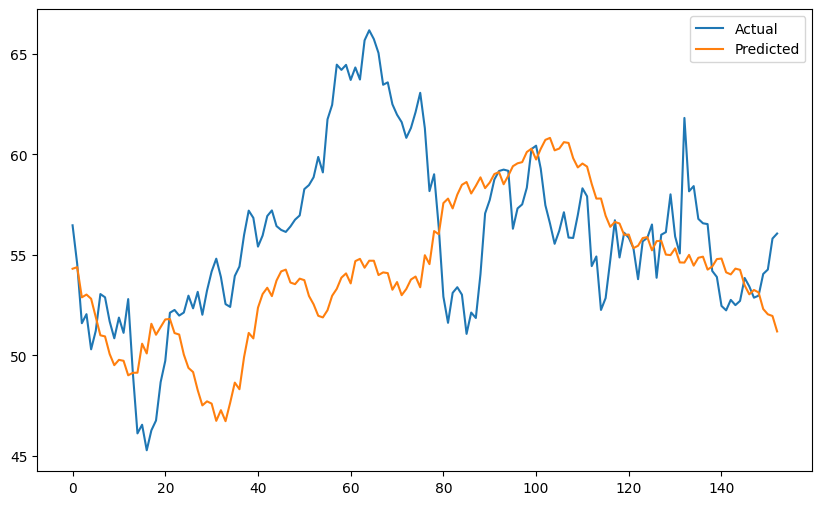

In [57]:
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

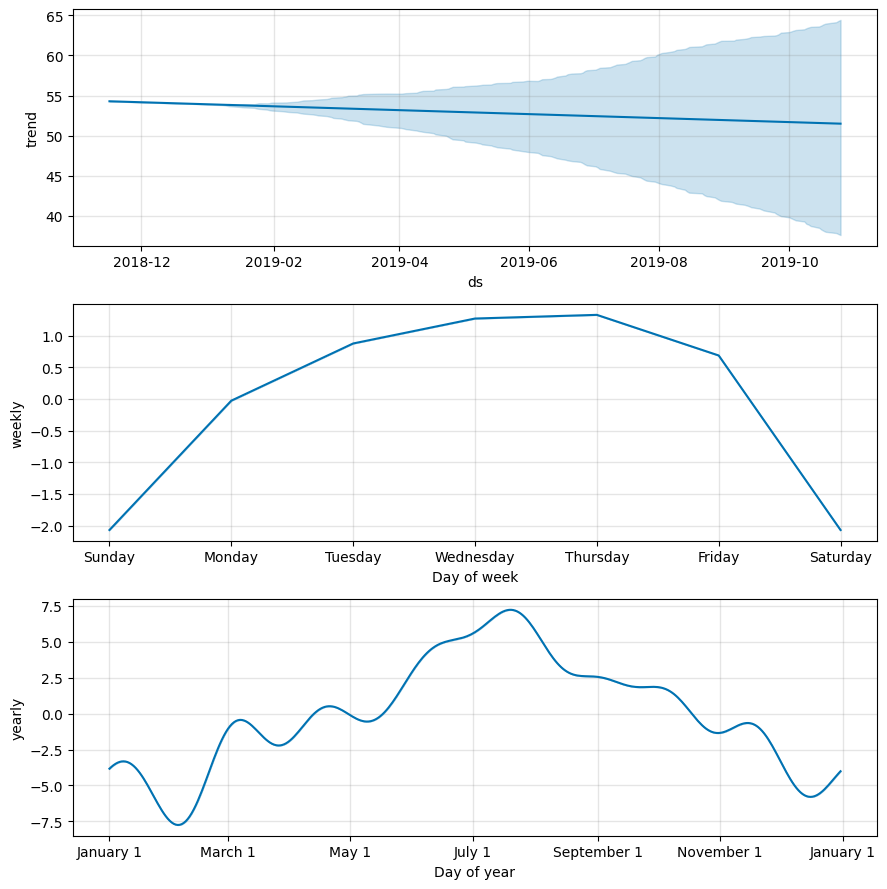

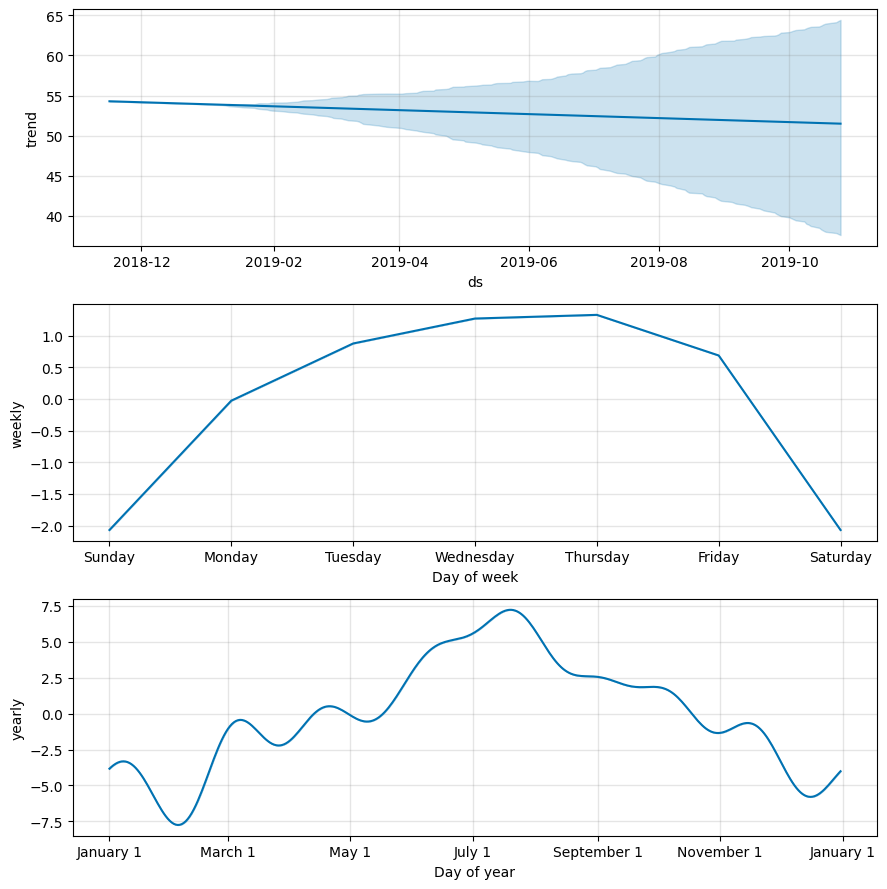

In [58]:
model.plot_components(forecast)

In [ ]:
# df.to_csv('df_Step1_EDA.csv', index=True)

<div style="text-align: left;">
    <h1 style=" font-weight: bold;">&star; End of Step4: Implementing the Prophet Algorithm</h1>
</div>
